### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from logistic_regression import LogisticRegression

### Loading and visualizing data

In [2]:
data = pd.read_csv('data.csv').values

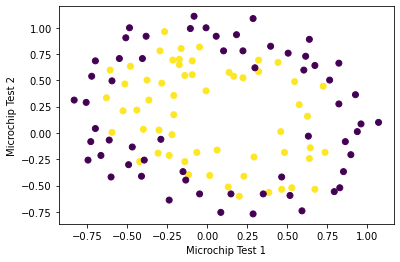

In [3]:
X, y = data[:, :-1], data[:, -1]
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

*=> We can notice from the graph that the data is **not linearly** separable.*

### Let’s create more features from each data point. We should map the features into all polynomial terms of 𝑥1 and 𝑥2 for 𝑄={1,…,6}

In [4]:
def map_features(X1, X2, degree):
    res = np.zeros(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    return res

In [5]:
Q_list = [1, 2, 3, 4, 5, 6]
mapped_list = []
for Q in Q_list:
    X_mapped = map_features(X[:, 0], X[:, 1], degree=Q)
    mapped_list.append(X_mapped)

### The number of the features that you obtain for each case of 𝑄 (you will have 6 cases)

In [6]:
for index, X_mapped in enumerate(mapped_list):
    Q = index + 1
    n_features = X_mapped.shape[1]
    print(f'For Q={Q} the number of features obtained is: {n_features}')

For Q=1 the number of features obtained is: 3
For Q=2 the number of features obtained is: 6
For Q=3 the number of features obtained is: 10
For Q=4 the number of features obtained is: 15
For Q=5 the number of features obtained is: 21
For Q=6 the number of features obtained is: 28


### Logistic regression algorithm for each case of 𝑄

In [7]:
results = []
for index, X_mapped in enumerate(mapped_list):
    X_train, X_test, y_train, y_test = train_test_split(X_mapped, y, test_size=0.2, random_state=1)
    lg = LogisticRegression(learning_rate=0.1, max_iters=10000)
    losses = lg.fit(X_train, y_train)
    results.append((lg, losses, X_test, y_test))

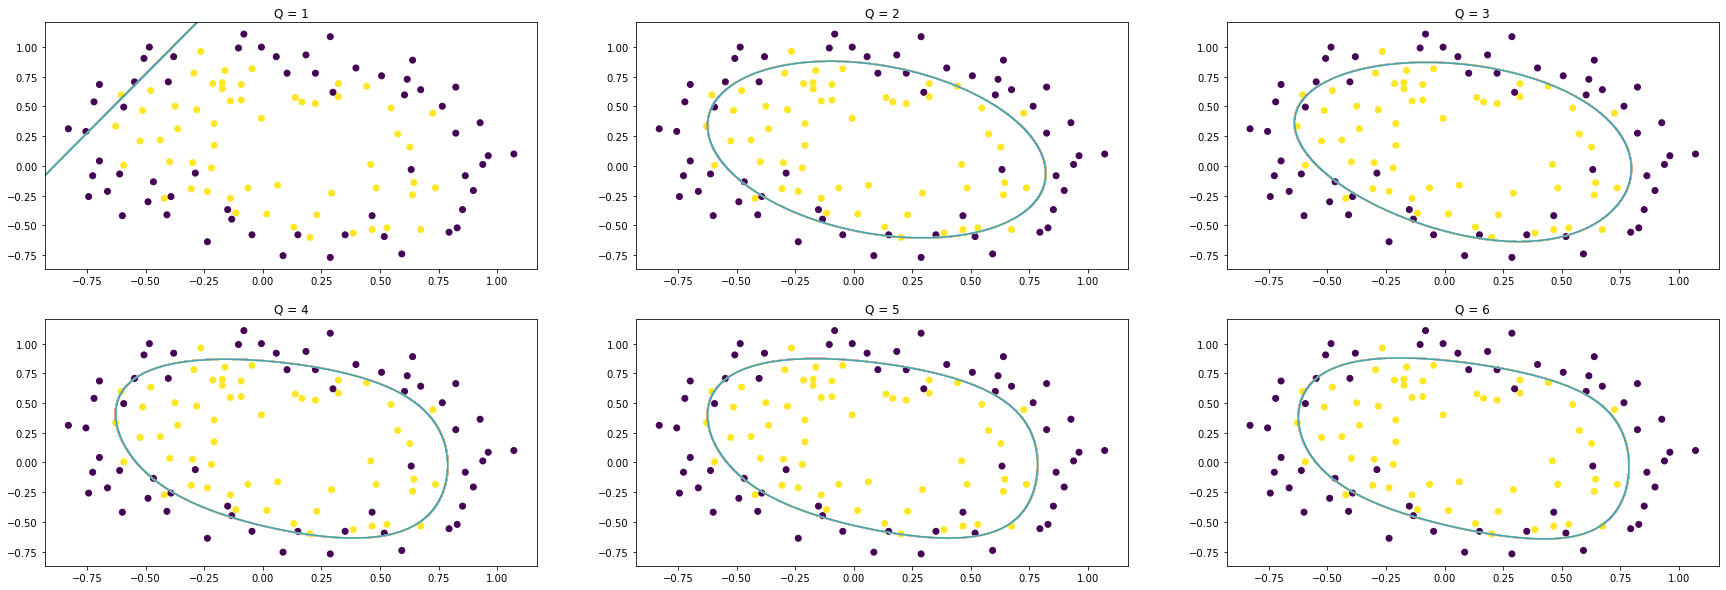

In [8]:
xx = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 1000)
yy = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 1000)
xx, yy = np.meshgrid(xx, yy)
fig, axes = plt.subplots(2, 3, figsize=(30, 10))
Q = 1
for i in range(2):
    for j in range(3):
        axes[i, j].set_title(f'Q = {Q}')
        axes[i, j].scatter(X[:, 0], X[:, 1], c=y)
        lg = results[Q - 1][0]
        X_poly = map_features(xx.ravel(), yy.ravel(), Q)
        z = lg.predict(X_poly)
        zz = z.reshape(xx.shape)
        axes[i, j].contour(xx, yy, zz, cmap=plt.cm.Spectral)
        Q += 1
plt.show()

### Reports for each case the training and the testing errors

In [9]:
for index, X_mapped in enumerate(mapped_list):
    Q = index + 1
    lg, losses, X_test, y_test = results[index]
    train_loss = losses[-1]
    w, b = lg.params['w'], lg.params['b']
    test_loss = lg.compute_loss(X_test, y_test, w, b)
    print(f'Logistic regression with Q={Q}:')
    print(f'\t-Training error: {train_loss}')
    print(f'\t-Testing error: {test_loss}\n')

Logistic regression with Q=1:
	-Training error: 0.6888364280376736
	-Testing error: 0.7589189658810818

Logistic regression with Q=2:
	-Training error: 0.4077982039645957
	-Testing error: 0.22473643604610177

Logistic regression with Q=3:
	-Training error: 0.4030421349835544
	-Testing error: 0.22903868768872485

Logistic regression with Q=4:
	-Training error: 0.3900836961708394
	-Testing error: 0.21025284081225853

Logistic regression with Q=5:
	-Training error: 0.38865805692877314
	-Testing error: 0.21073003811480084

Logistic regression with Q=6:
	-Training error: 0.38463103340187305
	-Testing error: 0.2086071107120886

